<a href="https://colab.research.google.com/github/LonghuaHu/deep-learning/blob/master/mnist_quaternion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
import h5py 
#data
f = h5py.File('/content/drive/My Drive/Colab Notebooks/new_quaternionImages.mat','r') 

X = f['quaternionImages'][:]
#data = data.T
print(X.shape)

#lable
f = h5py.File('/content/drive/My Drive/Colab Notebooks/new_quaternionImagesLabels.mat','r') 
y = f['quaternionImagesLabels'][:]
y = y.T
print(y.shape)



(10000, 12, 14, 14)
(10000, 1)


In [0]:
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42)

In [8]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 12, 14, 14) (2000, 12, 14, 14) (8000, 1) (2000, 1)


In [0]:
#data[0,7,0,0]

In [5]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], X_train.shape[3],1)
X_test = X_test.reshape(X_test.shape[0], X_train.shape[1], X_train.shape[2], X_train.shape[3],1)
#training_labels = training_labels[0]
y_train.astype(int)
y_test.astype(int)
print('Number of training examples: ' + str(X_train.shape[0]))
print('Training images shape:' + str(X_train.shape))
print('Training labels shape:' + str(y_train.shape))
print('Test images shape:' + str(X_test.shape))
print('Test labels shape:' + str(y_test.shape))

Number of training examples: 8000
Training images shape:(8000, 12, 14, 14, 1)
Training labels shape:(8000, 1)
Test images shape:(2000, 12, 14, 14, 1)
Test labels shape:(2000, 1)


In [6]:
import os
import tensorflow as tf
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv3D(8, (3,3,3), activation='relu', input_shape=(12, 14, 14, 1)))
#model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv3D(16, (1,3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 10, 12, 12, 8)     224       
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 10, 10, 10, 16)    1168      
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 10, 5, 5, 16)      0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 10, 5, 5, 16)      64        
_________________________________________________________________
flatten (Flatten)            (None, 4000)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               512128    
_________________________________________________________________
dens

In [8]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history1 = model.fit(X_train, y_train, epochs=50, verbose=1)
test_loss = model.evaluate(X_test, y_test)


#model.fit(X_train, y_train, epochs=30)
#test_loss = model.evaluate(X_test, y_test)

#model.fit(X_train, y_train, epochs=10,
#          validation_data=(X_test, y_test),
#          callbacks=[TrainValTensorBoard(write_graph=False)])

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
8000/8000 [==============================] - 6s 722us/sample - loss: 0.1738 - acc: 0.9490
Epoch 2/50
8000/8000 [==============================] - 3s 324us/sample - loss: 0.0596 - acc: 0.9827
Epoch 3/50
8000/8000 [==============================] - 3s 322us/sample - loss: 0.0261 - acc: 0.9914
Epoch 4/50
8000/8000 [==============================] - 3s 320us/sample - loss: 0.0185 - acc: 0.9936
Epoch 5/50
8000/8000 [==============================] - 3s 321us/sample - loss: 0.0095 - acc: 0.9969
Epoch 6/50
8000/8000 [==============================] - 3s 318us/sample - loss: 0.0065 - acc: 0.9979
Epoch 7/50
8000/8000 [==============================] - 3s 318us/sample - loss: 0.0050 - acc: 0.9983
Epoch 8/50
8000/8000 [==============================] - 3s 317us/sample - loss: 0.0030 - acc: 0.9989
Epoch 9/50
8000/8000 [==============================] - 3s 318us/sample - loss: 0.0019 - acc: 0.9994
Epoch 10/50
8000/8000 [====================

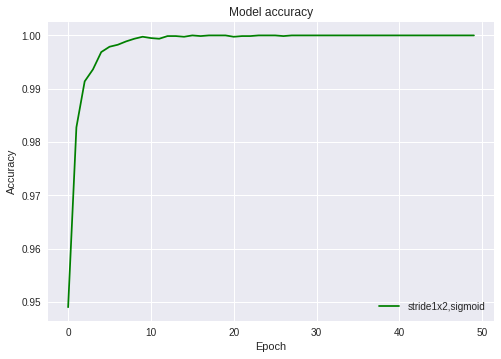

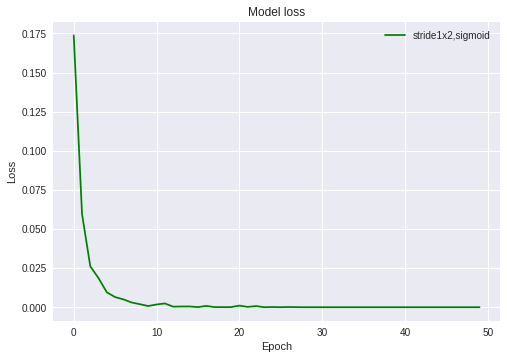

In [9]:
# Plot training accuracy values
plt.plot(history1.history['acc'], color='green', label='stride1x2,sigmoid')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training loss values
plt.plot(history1.history['loss'], color='green', label='stride1x2,sigmoid')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()




In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv3D(8, (3,3,3), activation='relu', input_shape=(12, 14, 14, 1)))
#model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
#model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv3D(16, (3,3,3), activation='relu'))
model.add(tf.keras.layers.Conv3D(32, (3,3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2)))
model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_2 (Conv3D)            (None, 10, 12, 12, 8)     224       
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 8, 10, 10, 16)     3472      
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 6, 8, 8, 32)       13856     
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 6, 4, 4, 32)       0         
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 6, 4, 4, 32)       128       
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               393344    
__________

In [11]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history4 = model.fit(X_train, y_train, epochs=50, verbose=1)
test_loss = model.evaluate(X_test, y_test)


#model.fit(X_train, y_train, epochs=30)
#test_loss = model.evaluate(X_test, y_test)

#model.fit(X_train, y_train, epochs=10,
#          validation_data=(X_test, y_test),
#          callbacks=[TrainValTensorBoard(write_graph=False)])

Epoch 1/50
8000/8000 [==============================] - 3s 395us/sample - loss: 0.1780 - acc: 0.9426
Epoch 2/50
8000/8000 [==============================] - 3s 349us/sample - loss: 0.0484 - acc: 0.9846
Epoch 3/50
8000/8000 [==============================] - 3s 348us/sample - loss: 0.0266 - acc: 0.9919
Epoch 4/50
8000/8000 [==============================] - 3s 352us/sample - loss: 0.0110 - acc: 0.9969
Epoch 5/50
8000/8000 [==============================] - 3s 354us/sample - loss: 0.0081 - acc: 0.9969
Epoch 6/50
8000/8000 [==============================] - 3s 354us/sample - loss: 0.0061 - acc: 0.9985
Epoch 7/50
8000/8000 [==============================] - 3s 353us/sample - loss: 0.0032 - acc: 0.9989
Epoch 8/50
8000/8000 [==============================] - 3s 350us/sample - loss: 0.0010 - acc: 0.9995
Epoch 9/50
8000/8000 [==============================] - 3s 352us/sample - loss: 0.0021 - acc: 0.9996
Epoch 10/50
8000/8000 [==============================] - 3s 349us/sample - loss: 0.0016 - a

In [0]:
# Plot training accuracy values
plt.plot(history1.history['acc'], color='green', label='stride1x2,sigmoid')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training loss values
plt.plot(history1.history['loss'], color='green', label='stride1x2,sigmoid')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()





In [14]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv3D(8, (3,3,3), activation='relu', input_shape=(12, 14, 14, 1)))
model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(2, 2, 2)))
model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Conv3D(16, (1,3,3), activation='relu'))
#model.add(tf.keras.layers.MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2)))
#model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_5 (Conv3D)            (None, 10, 12, 12, 8)     224       
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 5, 6, 6, 8)        0         
_________________________________________________________________
batch_normalization_v1_2 (Ba (None, 5, 6, 6, 8)        32        
_________________________________________________________________
flatten_2 (Flatten)          (None, 1440)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               184448    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 184,833
Trainable params: 184,817
Non-trainable params: 16
_________________________________________________________________


In [15]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history2 = model.fit(X_train, y_train, epochs=50, verbose=1)
test_loss = model.evaluate(X_test, y_test)


#model.fit(X_train, y_train, epochs=30)
#test_loss = model.evaluate(X_test, y_test)

#model.fit(X_train, y_train, epochs=10,
#          validation_data=(X_test, y_test),
#          callbacks=[TrainValTensorBoard(write_graph=False)])

Epoch 1/50
8000/8000 [==============================] - 2s 270us/sample - loss: 0.1905 - acc: 0.9284
Epoch 2/50
8000/8000 [==============================] - 2s 246us/sample - loss: 0.0889 - acc: 0.9728
Epoch 3/50
8000/8000 [==============================] - 2s 245us/sample - loss: 0.0659 - acc: 0.9770
Epoch 4/50
8000/8000 [==============================] - 2s 247us/sample - loss: 0.0480 - acc: 0.9834
Epoch 5/50
8000/8000 [==============================] - 2s 245us/sample - loss: 0.0464 - acc: 0.9822
Epoch 6/50
8000/8000 [==============================] - 2s 245us/sample - loss: 0.0343 - acc: 0.9875
Epoch 7/50
8000/8000 [==============================] - 2s 246us/sample - loss: 0.0287 - acc: 0.9918
Epoch 8/50
8000/8000 [==============================] - 2s 246us/sample - loss: 0.0276 - acc: 0.9904
Epoch 9/50
8000/8000 [==============================] - 2s 243us/sample - loss: 0.0214 - acc: 0.9923
Epoch 10/50
8000/8000 [==============================] - 2s 244us/sample - loss: 0.0194 - a

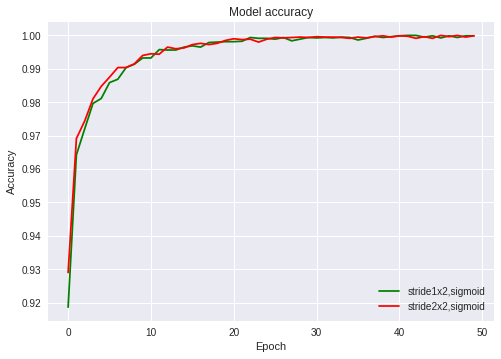

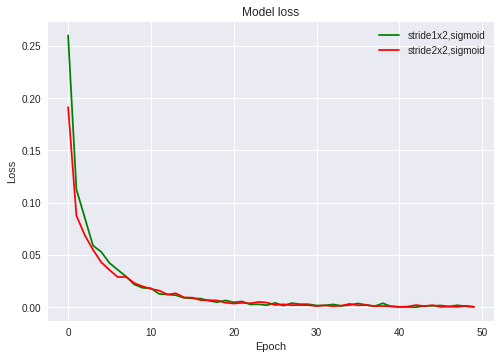

In [72]:
# Plot training accuracy values
plt.plot(history1.history['acc'], color='green', label='stride1x2,sigmoid')
plt.plot(history2.history['acc'], color='red', label='stride2x2,sigmoid')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training loss values
plt.plot(history1.history['loss'], color='green', label='stride1x2,sigmoid')
plt.plot(history2.history['loss'], color='red', label='stride2x2,sigmoid')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()



In [16]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv3D(8, (3,3,3), activation='relu', input_shape=(12, 14, 14, 1)))
model.add(tf.keras.layers.MaxPooling3D(pool_size=(2, 2, 2), strides=(1, 2, 2)))
model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Conv3D(16, (1,3,3), activation='relu'))
#model.add(tf.keras.layers.MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2)))
#model.add(tf.keras.layers.BatchNormalization())


#FC Layers
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dense(1, activation='tanh'))

model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_6 (Conv3D)            (None, 10, 12, 12, 8)     224       
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 9, 6, 6, 8)        0         
_________________________________________________________________
batch_normalization_v1_3 (Ba (None, 9, 6, 6, 8)        32        
_________________________________________________________________
flatten_3 (Flatten)          (None, 2592)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               331904    
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 332,289
Trainable params: 332,273
Non-trainable params: 16
_________________________________________________________________


In [17]:
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.0003),
              metrics=['acc'])

history3 = model.fit(X_train, y_train, epochs=50, verbose=1)
test_loss = model.evaluate(X_test, y_test)


#model.fit(X_train, y_train, epochs=30)
#test_loss = model.evaluate(X_test, y_test)

#model.fit(X_train, y_train, epochs=10,
#          validation_data=(X_test, y_test),
#          callbacks=[TrainValTensorBoard(write_graph=False)])

Epoch 1/50
8000/8000 [==============================] - 2s 298us/sample - loss: 1.6445 - acc: 0.8621
Epoch 2/50
8000/8000 [==============================] - 2s 252us/sample - loss: 0.7792 - acc: 0.9367
Epoch 3/50
8000/8000 [==============================] - 2s 254us/sample - loss: 0.6082 - acc: 0.9523
Epoch 4/50
8000/8000 [==============================] - 2s 252us/sample - loss: 0.5663 - acc: 0.9571
Epoch 5/50
8000/8000 [==============================] - 2s 250us/sample - loss: 0.4686 - acc: 0.9636
Epoch 6/50
8000/8000 [==============================] - 2s 246us/sample - loss: 0.4424 - acc: 0.9671
Epoch 7/50
8000/8000 [==============================] - 2s 249us/sample - loss: 0.4128 - acc: 0.9681
Epoch 8/50
8000/8000 [==============================] - 2s 251us/sample - loss: 0.3800 - acc: 0.9720
Epoch 9/50
8000/8000 [==============================] - 2s 247us/sample - loss: 0.3494 - acc: 0.9744
Epoch 10/50
8000/8000 [==============================] - 2s 249us/sample - loss: 0.3118 - a

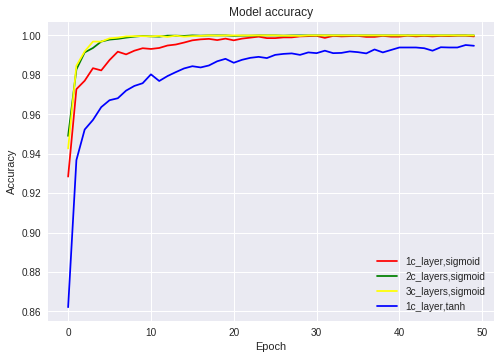

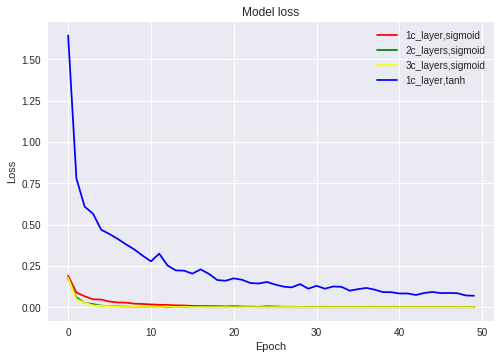

In [19]:
# Plot training accuracy values
plt.plot(history2.history['acc'], color='red', label='1c_layer,sigmoid')
plt.plot(history1.history['acc'], color='green', label='2c_layers,sigmoid')
plt.plot(history4.history['acc'], color='yellow', label='3c_layers,sigmoid')
plt.plot(history3.history['acc'], color='blue', label='1c_layer,tanh')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training loss values
plt.plot(history2.history['loss'], color='red', label='1c_layer,sigmoid')
plt.plot(history1.history['loss'], color='green', label='2c_layers,sigmoid')
plt.plot(history4.history['loss'], color='yellow', label='3c_layers,sigmoid')
plt.plot(history3.history['loss'], color='blue', label='1c_layer,tanh')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


